In [149]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [150]:
medianhouseholdincome = pd.read_csv('medianhouseholdincome2.csv', sep = ',')
medianhouseholdincome = medianhouseholdincome.transpose()
medianhouseholdincome = medianhouseholdincome.rename(columns = {0:'medianhouseholdincome'})
medianhouseholdincome["medianhouseholdincome"] = [float(str(i).replace(",", "")) for i in medianhouseholdincome["medianhouseholdincome"]]
medianhouseholdincome.head()

,medianhouseholdincome
1974,11196.68
1975,11799.94
1976,12685.08
1977,13573.15
1978,15064.81


In [151]:
yearlyavghomeprice = pd.read_csv('yearlyavghomeprice2.csv', sep = ',')
yearlyavghomeprice = yearlyavghomeprice.transpose()
yearlyavghomeprice = yearlyavghomeprice.rename(columns = {0:'yearlyavghomeprice'})
yearlyavghomeprice["yearlyavghomeprice"] = [float(str(i).replace(",", "")) for i in yearlyavghomeprice["yearlyavghomeprice"]]
yearlyavghomeprice.head()

,yearlyavghomeprice
1971,26372.58222
1972,27298.87417
1973,27865.85000
1974,29965.76333
1975,32628.75917


In [152]:
interestrates = pd.read_csv('interestrates.csv', sep = ',')
interestrates = interestrates.transpose()
interestrates = interestrates.iloc[1:, :]
interestrates = interestrates.rename(columns = {0:'interestrates'})
#converting from string to float

interestrates.head()

,interestrates
1971,7.54175
1972,7.383269
1973,8.044808
1974,9.187115
1975,9.047115


In [153]:
df = pd.concat([yearlyavghomeprice,medianhouseholdincome], axis=1)
df = pd.concat([df, interestrates], axis=1)
df['year'] = df.index
df = df.dropna()

df.interestrates = (df.interestrates /100) / 12 # how interest rates are given by lenders
# https://www.bankrate.com/mortgages/mortgage-calculator/#calculate-mortgage-payment
interestrates["interestrates"] = [float(str(i).replace(",", "")) for i in interestrates["interestrates"]]

df.insert(3,'monthlypayment',0)
n = 360
df.monthlypayment = df.yearlyavghomeprice * ((df.interestrates * ((1+df.interestrates) ** n)) / ((1+df.interestrates) ** n - 1))

df.insert(4,'hai',0)
df.hai = (((df.medianhouseholdincome) / (df.monthlypayment * 4 * 12)) * 100)

df.to_csv('haidata.csv')

df

,yearlyavghomeprice,medianhouseholdincome,interestrates,monthlypayment,hai,year
1974,29965.76333,11196.68,0.007656,245.156625,95.149036,1974
1975,32628.75917,11799.94,0.007539,263.645279,93.243499,1975
1976,35001.96417,12685.08,0.007388,278.26175,94.972629,1976
1977,39198.75917,13573.15,0.007371,311.045658,90.910756,1977
1978,45153.85417,15064.81,0.008035,384.356108,81.6561,1978
1979,52101.46083,16461.74,0.009336,504.208505,68.018074,1979
1980,57170.64417,17709.30,0.011452,665.746606,55.418044,1980
1981,60805.04167,19075.08,0.013868,849.206165,46.796351,1981
1982,62062.43167,20170.91,0.01337,836.773899,50.219933,1982
1983,63978.57667,20884.39,0.011029,719.520597,60.469632,1983


#### How this index works:

"A higher HAI ratio indicates relatively more affordability. A ratio of 100 indicates that median- family income is just sufficient to purchase the median-priced home. When the ratio falls below 100, as it did during the late-1970s and through the mid-1980s (illustrated in Chart 1), the typical household has less income than necessary to purchase the typical house."

https://www.frbsf.org/education/publications/doctor-econ/2003/december/housing-affordability-index/

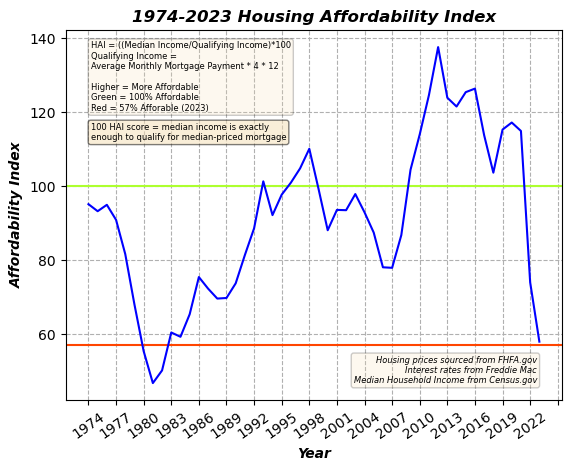

In [154]:
textstr = 'HAI = ((Median Income/Qualifying Income)*100\nQualifying Income = \nAverage Monthly Mortgage Payment * 4 * 12\n\nHigher = More Affordable\nGreen = 100% Affordable\nRed = 57% Afforable (2023)'
textstr2 = '100 HAI score = median income is exactly\nenough to qualify for median-priced mortgage'
textstr3 = 'Housing prices sourced from FHFA.gov\nInterest rates from Freddie Mac\nMedian Household Income from Census.gov'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
props2 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


fig, ax = plt.subplots()
plt.title('1974-2023 Housing Affordability Index', style = 'italic', weight='bold')
plt.xlabel('Year', style='italic', weight='bold')
plt.ylabel('Affordability Index', style='italic', weight='bold')
plt.xticks(np.arange(0, 2023, 3))
plt.xticks(rotation=35)
plt.axhline(100, color = 'greenyellow')
plt.axhline(57, color = 'orangered')
#ax.set_facecolor('ghostwhite')
ax.text(0.05, .97, textstr, transform=ax.transAxes, fontsize=6,
        verticalalignment='top', bbox=props,)
ax.text(0.05, 0.75, textstr2, transform=ax.transAxes, fontsize=6,
        verticalalignment='top', bbox=props2,)
ax.text(.95, 0.12, textstr3, transform=ax.transAxes, fontsize=6,
        verticalalignment='top',horizontalalignment='right', bbox=props, style='italic')


ax.grid('on')
ax.grid(linestyle='--')
plt.plot(df['year'], df['hai'], c = 'b')